In [1]:
import pandas as pd
import numpy as np
import requests
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import re

In [3]:
data = pd.read_csv("airtableFinal.csv")

In [5]:
tdata.columns

Index(['Title/ Name ', 'Flavors', 'Front Screenshots', 'Back Screenshots',
       'FRONT Removed Background', 'BACK Removed Background',
       'Front shadow w/ removed background',
       'Colored Front card w/ shadow and name',
       'Colored Back card w/ shadow and name',
       'Errunds inc. WM, Colored Front card w/ shadow and name',
       'Errunds inc. WM, Colored Back card w/ shadow and name',
       'TYCA WM, Colored Front card w/ shadow and name',
       'TYCA WM, Colored Back card w/ shadow and name'],
      dtype='object')

In [106]:
def tt(url):
  image = Image.open(requests.get(url, stream=True).raw)
  image = np.asarray(image)

  image1 = cv2.copyMakeBorder(image.copy(), 30, 30, 30, 30, cv2.BORDER_CONSTANT, value=0)

  gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  ret, binary = cv2.threshold(gray, 50, 200, cv2.THRESH_BINARY_INV)
  
  contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  sortedCont = sorted(contours, key=cv2.contourArea)

  x,y,w,h = cv2.boundingRect(sortedCont[-2])
  cv2.rectangle(image1,(x,y),(x+w,y+h),(238,0,43),3)

  return cv2.contourArea(sortedCont[-2]) < (200*200)

In [98]:
def imageCheck(url):
  image = Image.open(requests.get(url, stream=True).raw)
  image = np.asarray(image)

  image1 = cv2.copyMakeBorder(image.copy(), 30, 30, 30, 30, cv2.BORDER_CONSTANT, value=0)

  gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
  ret, binary = cv2.threshold(gray, 50, 200, cv2.THRESH_BINARY_INV)
  
  contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
  sortedCont = sorted(contours, key=cv2.contourArea)

  x,y,w,h = cv2.boundingRect(sortedCont[-2])
  cv2.rectangle(image1,(x,y),(x+w,y+h),(238,0,43),3)

  print(cv2.contourArea(sortedCont[-2]) < 200*200, ", original size: ", cv2.contourArea(sortedCont[-2]))
  plt.imshow(image1)
  plt.show()

False , original size:  811799.0


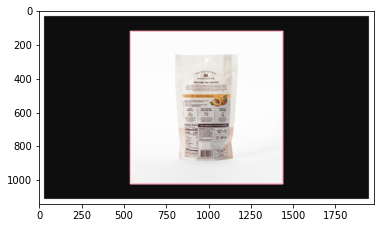

False , original size:  1001999.0


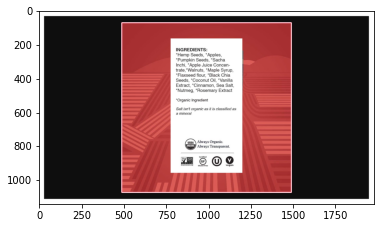

False , original size:  292269.0


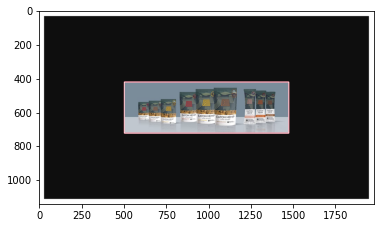

False , original size:  2252999.0


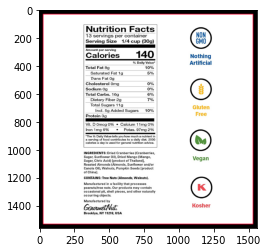

False , original size:  938197.0


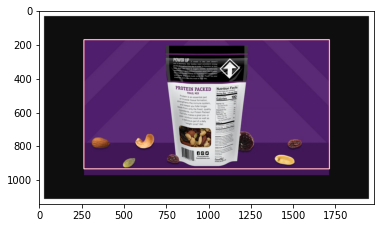

False , original size:  344635.0


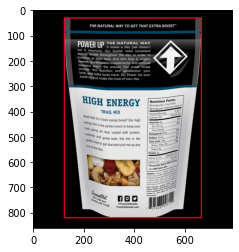

False , original size:  1168559.0


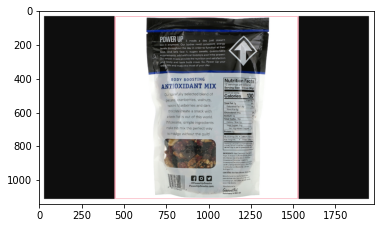

False , original size:  12083357.5


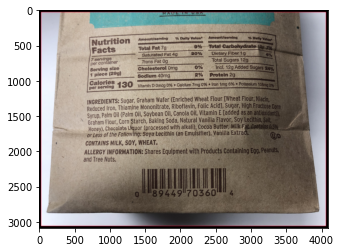

False , original size:  1533846.5


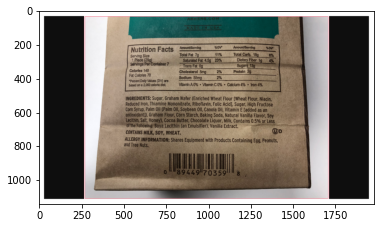

False , original size:  50248.0


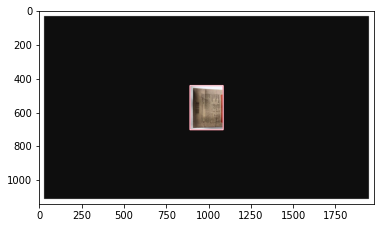

In [133]:
for index, _ in data[:10].iterrows():
  if not pd.isnull(data.at[index, 'Back Screenshots']):
    fileName = data.at[index, 'Back Screenshots'].split()[-1]
    url = re.sub("['(', ')']", "", fileName)
    imageCheck(url)

In [107]:
frontImageChange = []

In [134]:
backImageChange = []

In [147]:
for index, _ in data[1000:].iterrows():
  if not pd.isnull(data.at[index, 'Back Screenshots']):
    fileName = data.at[index, 'Back Screenshots'].split()[-1]
    url = re.sub("['(', ')']", "", fileName)
    status = tt(url)
    if status == True:
      backImageChange.append(index+1)
    print(index+1, status)

1001 False
1004 False
1005 False
1007 False
1008 False
1016 False
1017 False
1019 True
1024 False
1030 False
1031 False
1032 False
1033 True
1034 False
1035 False
1036 False
1039 False
1041 False
1043 False
1044 False
1045 False
1046 False
1047 False
1048 False
1052 False
1053 False
1054 False
1055 False
1062 False
1064 True
1066 False
1067 False
1071 True
1073 False
1076 False
1077 False
1085 False
1087 False
1088 False
1089 False
1101 True
1115 False
1116 False
1117 False
1118 False
1125 False
1126 False
1129 False
1130 False
1132 False
1147 False
1154 False
1155 False
1159 False
1162 False
1163 False
1169 False
1170 False
1171 False
1175 False
1178 False
1179 False
1180 False
1181 False
1184 False
1185 False
1190 False
1191 False
1192 False
1200 False
1203 False
1204 False
1212 False
1214 False
1215 False
1216 False
1223 False
1224 False
1225 False
1243 False
1267 False
1268 False
1269 False
1270 False
1271 False
1273 False
1275 False
1277 True
1279 False
1281 False
1286 False
1287 